Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


[np.float64(290.902632271942), np.float64(290.8994694968129), np.float64(290.89770245136026), np.float64(290.9031986058184), np.float64(290.8974082010059), np.float64(290.8982353514008), np.float64(290.90164175281024), np.float64(290.8990904598765), np.float64(290.9032515716464), np.float64(290.8974854503034), np.float64(290.9034614368819), np.float64(290.898538352364), np.float64(290.9011002609226), np.float64(290.90274222009157), np.float64(290.90106033666405), np.float64(290.90321124097244), np.float64(290.90042051781205), np.float64(290.90240896942555), np.float64(290.9002740546305), np.float64(290.90250456899776), np.float64(290.90038100782675), np.float64(290.8973233052802), np.float64(290.898227051619), np.float64(290.89872824139263), np.float64(290.90067212511764), np.float64(290.9033271890502), np.float64(290.90248008954745), np.float64(290.90396979279376), np.float64(290.9020778670495), np.float64(290.9029081358257), np.float64(290.89759838094636), np.float64(290.903502434989

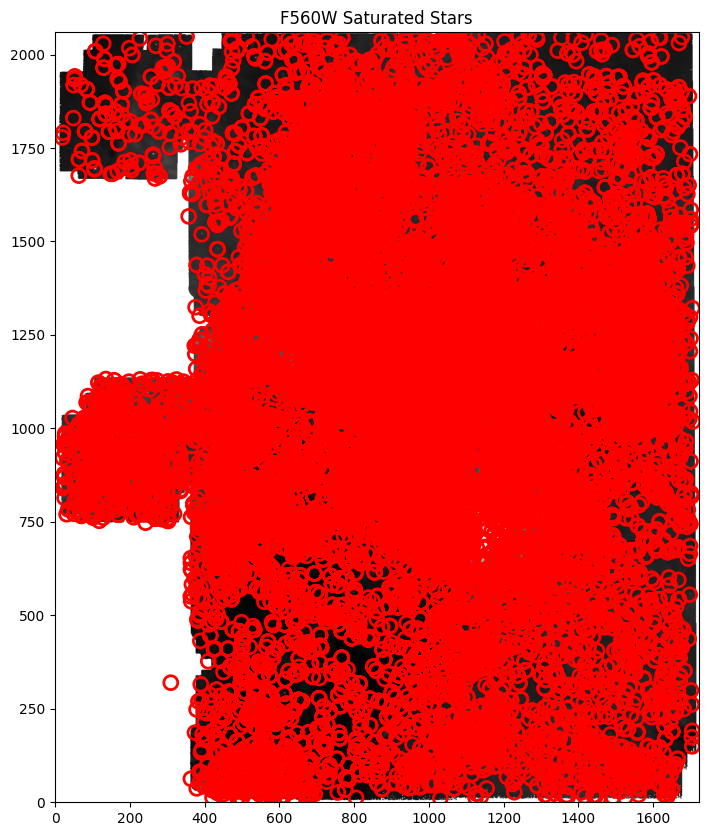

In [8]:
import glob
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
import numpy as np
from jwst.datamodels import dqflags
from scipy.ndimage import label, find_objects, center_of_mass, sum_labels
from astropy import units as u

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", 
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}


pad=30
filt = 'F560W'
if filt in ['F140M', 'F162M', 'F182M', 'F210M', 'F335M', 'F360M', 'F410M', 'F480M']:
    modules = ['nrca', 'nrcb']
else:
    modules = ['miri']
skycoords = []
for module in modules:
    sat_star_list = glob.glob(f"/orange/adamginsburg/jwst/w51/{filt}/*{module}*daophot_combined_with_satstars.fits")
    for i, sat_star in enumerate(sat_star_list):
        if True:
          
            cat_satstar = Table.read(sat_star)
            skycoord = cat_satstar['skycoord_centroid']
            skycoords.extend(skycoord)


img = image_filenames[filt.lower()]            

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
hdul = fits.open(img)
wcs = WCS(hdul[1].header)
data = hdul[1].data
norm = simple_norm(data, 'sqrt', percent=99.5)
ax.imshow(data, norm=norm, origin='lower', cmap='gray')
print(ras, decs)
ras = [sc.ra.deg for sc in skycoords]
decs = [sc.dec.deg for sc in skycoords]
cat = SkyCoord(ra=ras*u.deg, dec=decs*u.deg)
pix_coords = cat.to_pixel(wcs)
ax.scatter(pix_coords[0], pix_coords[1], s=100, edgecolor='red', facecolor='none', lw=2)
ax.set_title(f"{filt} Saturated Stars")
plt.show()




['skycoord_ra', 'skycoord_dec', 'flux_fit_f140m', 'flux_err_f140m', 'nmatch_f140m', 'nmatch_good_f140m', 'qfit_f140m', 'cfit_f140m', 'sharpness_f140m', 'roundness1_f140m', 'roundness2_f140m', 'from_sat_catalog_f140m', 'flux_fit_f480m', 'flux_err_f480m', 'nmatch_f480m', 'nmatch_good_f480m', 'qfit_f480m', 'cfit_f480m', 'sharpness_f480m', 'roundness1_f480m', 'roundness2_f480m', 'from_sat_catalog_f480m', 'flux_fit_f560w', 'flux_err_f560w', 'nmatch_f560w', 'nmatch_good_f560w', 'qfit_f560w', 'cfit_f560w', 'sharpness_f560w', 'roundness1_f560w', 'roundness2_f560w', 'from_sat_catalog_f560w', 'flux_fit_f162m', 'flux_err_f162m', 'nmatch_f162m', 'nmatch_good_f162m', 'qfit_f162m', 'cfit_f162m', 'sharpness_f162m', 'roundness1_f162m', 'roundness2_f162m', 'from_sat_catalog_f162m', 'flux_fit_f182m', 'flux_err_f182m', 'nmatch_f182m', 'nmatch_good_f182m', 'qfit_f182m', 'cfit_f182m', 'sharpness_f182m', 'roundness1_f182m', 'roundness2_f182m', 'from_sat_catalog_f182m', 'flux_fit_f187n', 'flux_err_f187n', 'n

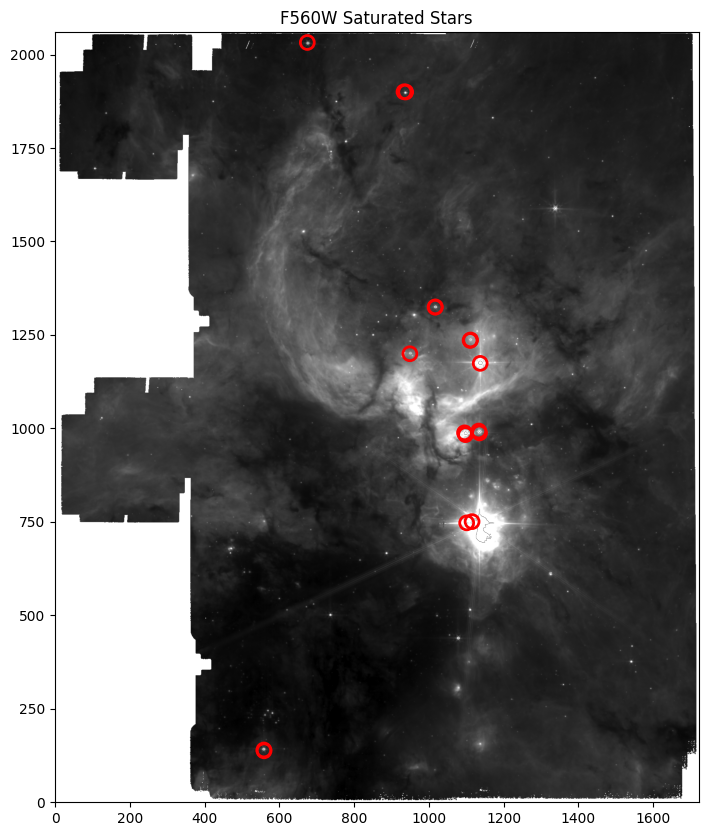

In [13]:
catalog = Table.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/catalogs/final_catalog.fits')
print(catalog.colnames)

idx = np.where(catalog['from_sat_catalog_f560w'] == True)[0]
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
hdul = fits.open(img)
wcs = WCS(hdul[1].header)
data = hdul[1].data
norm = simple_norm(data, 'sqrt', percent=99.5)
ax.imshow(data, norm=norm, origin='lower', cmap='gray')
print(ras, decs)

ras = catalog['skycoord_ra'][idx]
decs = catalog['skycoord_dec'][idx]


cat = SkyCoord(ra=ras, dec=decs, unit='deg')
pix_coords = cat.to_pixel(wcs)
ax.scatter(pix_coords[0], pix_coords[1], s=100, edgecolor='red', facecolor='none', lw=2)
ax.set_title(f"{filt} Saturated Stars")
plt.show()
 
